\author{Fan Jiang, 11310129}

# Introduction

This document is the solution on the Implementation of FFT for the DSP Autumn 2015 session.

# Section 1

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

from sympy import *
init_printing()
%config InlineBackend.figure_formats=['svg','pdf']

First let's see the definition of DFT:
$$X(k)=\sum_{n=0}^{N-1}x[n]W^{kn}_N$$

For each k, we will need $N$ complex multiplications which equals to $4N$ real multiplications and $4N-2$ real additions. As $0\leq k \leq N-1$, the total number of multiplications and additions is $4N^2$ and $(4N-2)N$ respectively.

# Section 2



If $M$ DFT samples of the $N$-point DFT of a length-$N$ sequence are required with $M\leq N$, what is the smallest value of $M$ for which the $N$-point radix-2 FFT algorithm is computationally more efficient than a direct computation of the $M$ DFT samples? What are the values of $M$ for the following values of $N$: $N=32$, $N=64$, and $N=128$.

As multiplication takes significantly more time than additions, we may ignore addition instructions. Thus the time complexity for a radix-2 FFT is $2Mlog_2N$, and for DFT is $4MN$.

In [5]:
from sympy.abc import m,n

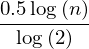

In [11]:
0.5*log(n,2)

In [12]:
0.5*log(32,2)

In [13]:
0.5*log(64,2)

In [14]:
0.5*log(128,2)

# Section 3

A 256-point DFT of a length-197 sequence $x[n]$
is to be computed.
- How many zero-valued samples should be appended
to $x[n]$ prior to the computation of the DFT?
- What are the total number of complex multiplications and additions needed for the direct evaluation of all DFT samples?
- What are the total number of complex multiplications and additions needed if a Cooley-Tukey type FFT is used to compute the DFT samples?

**Q1**

In [23]:
str(256-197)

'59'

**Q2**

In [21]:
"Multi:%d,Add:%d"%(256**2,256*(256-1))

'Multi:65536,Add:65280'

**Q3**

In [22]:
"Multi:%d,Add:%d"%(256/2*log(256,2),256*log(256,2))

'Multi:1024,Add:2048'

# Section 4

Using the FFT algorithm, compute the 8-point DFT of the 8-point signal $x = [4, -3, 2, 0, -1, -2, 3, 1]$.

In [29]:
def fft(vector, inverse):
    # Returns the integer whose value is the reverse of the lowest 'bits' bits of the integer 'x'.
    def reverse(x, bits):
        y = 0
        for i in range(bits):
            y = (y << 1) | (x & 1)
            x >>= 1
        return y
    
    # Initialization
    n = len(vector)
    levels = 0
    while True:
        if 1 << levels == n:
            break
        elif 1 << levels > n:
            raise ValueError("Length is not a power of 2")
        else:
            levels += 1
    # Now, levels = log2(n)
    exptable = [exp((2j) * pi * i / n) for i in range(n // 2)]
    vector = [vector[reverse(i, levels)] for i in range(n)]  # Copy with bit-reversed permutation
    
    # Radix-2 decimation-in-time FFT
    size = 2
    while size <= n:
        halfsize = size // 2
        tablestep = n // size
        for i in range(0, n, size):
            k = 0
            for j in range(i, i + halfsize):
                temp = vector[j + halfsize] * exptable[k]
                vector[j + halfsize] = vector[j] - temp
                vector[j] += temp
                k += tablestep
        size *= 2
    return vector

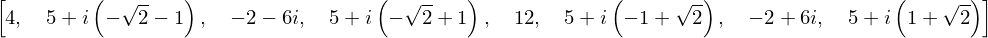

In [44]:
result=fft([4, -3, 2, 0, -1, -2, 3, 1],False)
map(lambda x:nsimplify(x),result)